##MÉTRICAS OBJETIVO
---
---


Estas son algunas de las preguntas que se realizan desde la gerencia, datos necesarios para la toma de decisiones:
- ¿Cuál fue el mejor mes para las ventas? ¿Cuánto se ganó ese mes?
- ¿Qué ciudad tuvo el mayor número de ventas?
- ¿A qué hora debemos mostrar la publicidad para maximizar la probabilidad de que el cliente compre el producto?
- ¿Qué productos se venden juntos con más frecuencia?
- ¿Qué producto se vendió más? ¿Por qué crees que vendió más?


#DEPENDENCIES
---
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import combinations
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

## EXECUTION
---
---

In [ ]:
# Lectura de los datos
df = pd.read_csv('all_data.csv')

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
print(df.shape)
df.info()

(186850, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
# Busqueda de valores nulos y duplicados
miss = df.isnull().sum()
miss

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
print('El {:.2f}% de los valores son nulos'.format(100*miss.sum()/np.product(df.shape)))

El 0.29% de los valores son nulos


In [ ]:
df[df.duplicated()].shape[0]

1162

In [ ]:
print('El {:.2f}% de los valores son nulos'.format(100*np.product(df[df.duplicated()].shape)/np.product(df.shape)))

El 0.62% de los valores son nulos


In [ ]:
#Eliminación registros nulos 
df.drop(df[df['Order ID'].isnull()].index, axis=0, inplace=True)
df.drop(df[df.duplicated()].index, axis=0, inplace=True)
df.drop([211], axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
#Conversión tipos de datos
df['Order ID'] = pd.to_numeric(df['Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [ ]:
#Creación nuevos features
df['Day'] = df['Order Date'].apply(lambda x: x.day)
df['Month'] = df['Order Date'].apply(lambda x: x.month)
df['Year'] = df['Order Date'].apply(lambda x: x.year)
df['Hour'] = df['Order Date'].apply(lambda x: x.hour)

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip(' '))
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
df['Postal code'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[2])

df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Hour,City,State,Postal code,Sales
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",31,8,2019,22,Seattle,WA,98101,23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",15,8,2019,15,Dallas,TX,75001,99.99
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",6,8,2019,14,Portland,OR,97035,700.00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",29,8,2019,20,Los Angeles,CA,90001,7.68
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",15,8,2019,19,New York City,NY,10001,7.68


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

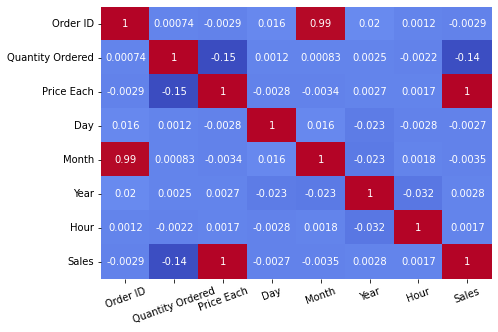

In [ ]:
#Correlación de los features
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cmap='coolwarm', cbar=False)
plt.xticks(rotation=20)

Text(0.5, 1.0, 'NÚMERO DE VENTAS POR MES')

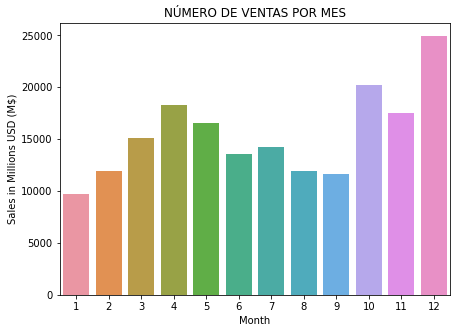

In [ ]:
# ¿Cuál fue el mejor mes para las ventas? 
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Month')
plt.ylabel("Número de ventas")
plt.ylabel("Sales in Millions USD (M$)")
plt.title('NÚMERO DE VENTAS POR MES')

El gráfico nos muestra la distribución de las ventas a lo largo del año 2019, en donde se evidencia que los meses anteriores a la temporada decembrina son los de más flujo de ventas, siendo diciembre el mejor mes para la empresa.

Valor total de ventas mejor mes: 4608295.7


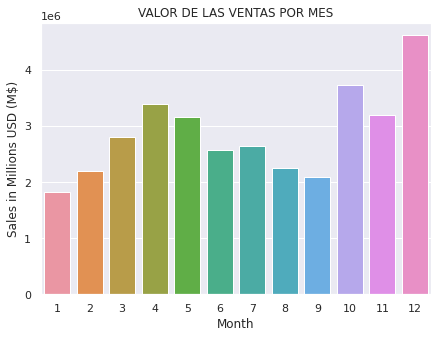

In [ ]:
# ¿Cuánto se ganó ese mes?
sales_per_month =df.groupby('Month').sum()['Sales']

plt.figure(figsize=(7,5))
sns.barplot(x=sales_per_month.index, y=sales_per_month)
plt.ylabel("Sales in Millions USD (M$)")
plt.title('VALOR DE LAS VENTAS POR MES')

print("Valor total de ventas mejor mes: {}".format(sales_per_month[12]))

El total de las ventas registradas en el mes de diciembre asciende a los 4.6 millones USD.

Valor total de ventas en la ciudad con mayor rendimiento: 8254743.55


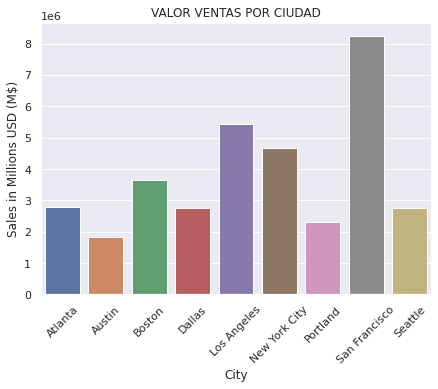

In [ ]:
# ¿Qué ciudad tuvo el mayor número de ventas?
sales_per_city = df.groupby('City').sum()['Sales']

plt.figure(figsize=(7,5))
sns.barplot(x=sales_per_city.index, y=sales_per_city)
plt.ylabel("Sales in Millions USD (M$)")
plt.xticks(rotation=45)
plt.title('VALOR VENTAS POR CIUDAD')

print("Valor total de ventas en la ciudad con mayor rendimiento: {}".format(sales_per_city['San Francisco']))

In [ ]:
# Mapa de ventas
cities = pd.read_csv('/content/cities.csv').set_index('City')
sales_map= pd.DataFrame(sales_per_city).set_index([pd.Index(['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York',
       'Portland', 'San Francisco', 'Seattle'])])

map = pd.merge(cities, sales_map, how='right', left_index=True, right_index=True, sort=True)
map=map[map['State']!='Maine'].reset_index().rename(columns={'index':'City'})

In [ ]:
fig = px.scatter_mapbox(map, lat="lat", lon="lon", hover_name="City", hover_data=["State"], size="Sales",
                        color="Sales", color_continuous_scale=px.colors.sequential.solar, zoom=2, height=300, width=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show() 

In [37]:
# Mapa de ventas a través del tiempo
sales_maptime = df[df['Year']!=2020].groupby(['City', 'Month']).sum()['Sales'].reset_index()
sales_maptime['City'] = sales_maptime['City'].apply(lambda x: x.rsplit(' ',1)[0] if x=='New York City' else x)
sales_maptime['Month'] = sales_maptime['Month'].map({1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo',
                6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'})
sales_maptime = sales_maptime.set_index('City')

map_time = pd.merge(cities, sales_maptime, how='right', left_index=True, right_index=True, sort=True)
map_time=map_time[map_time['State']!='Maine'].reset_index().rename(columns={'index':'City'})

In [38]:
fig2 = px.scatter_mapbox(map_time, lat="lat", lon="lon", hover_name="City", hover_data=["State"], size="Sales", animation_frame="Month",
                        color="Sales", color_continuous_scale=px.colors.sequential.solar, zoom=2, height=400, width=600)
fig2.update_layout(mapbox_style="open-street-map")
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show() 

La ciudad con el mayor número de ventas fue San Francisco con un total de 8.2 millones USD.

Text(0.5, 1.0, 'VENTAS POR HORA')

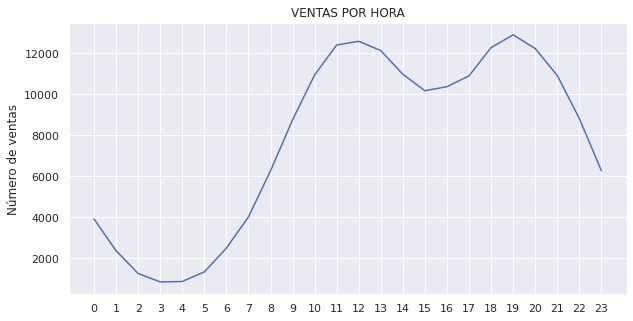

In [ ]:
# ¿A qué hora debemos mostrar la publicidad para maximizar la probabilidad de que el cliente compre el producto?
sales_per_hour = df.groupby('Hour').count()['Product']

plt.figure(figsize=(10,5))
plt.plot(sales_per_hour)
plt.xticks(ticks=sales_per_hour.index)
plt.ylabel("Número de ventas")
plt.title('VENTAS POR HORA')

El mejor horario para presentar publicidad a nuestros clientes está entre las 9 AM y las 10 PM, con 2 fuertes picos a las 12 PM y 7 PM que coinciden con los horarios de la comida y la cena.

In [ ]:
# ¿Qué productos se venden juntos con más frecuencia?
data = df[df['Order ID'].duplicated(keep=False)]
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
data = data[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()

for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

most_sold_products = pd.DataFrame(count.most_common(10), columns=['List_products','Num_sales'])

Text(0.5, 1.0, 'PAREJA DE ARTÍCULOS MÁS VENDIDOS')

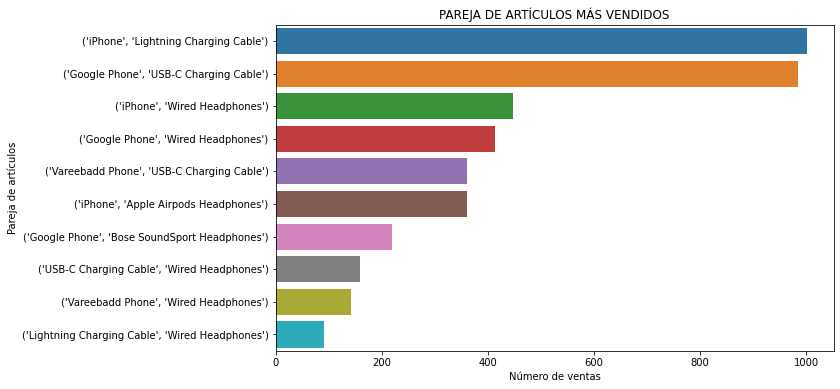

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=most_sold_products, y=most_sold_products['List_products'], x=most_sold_products['Num_sales'])
plt.xlabel("Número de ventas")
plt.ylabel("Pareja de artículos")
plt.title('PAREJA DE ARTÍCULOS MÁS VENDIDOS')

El IPhone y el cable de carga son los elementos que más se compran en conjunto, claramente por la necesidad de uno de ellos para el funcionamiento del otro.

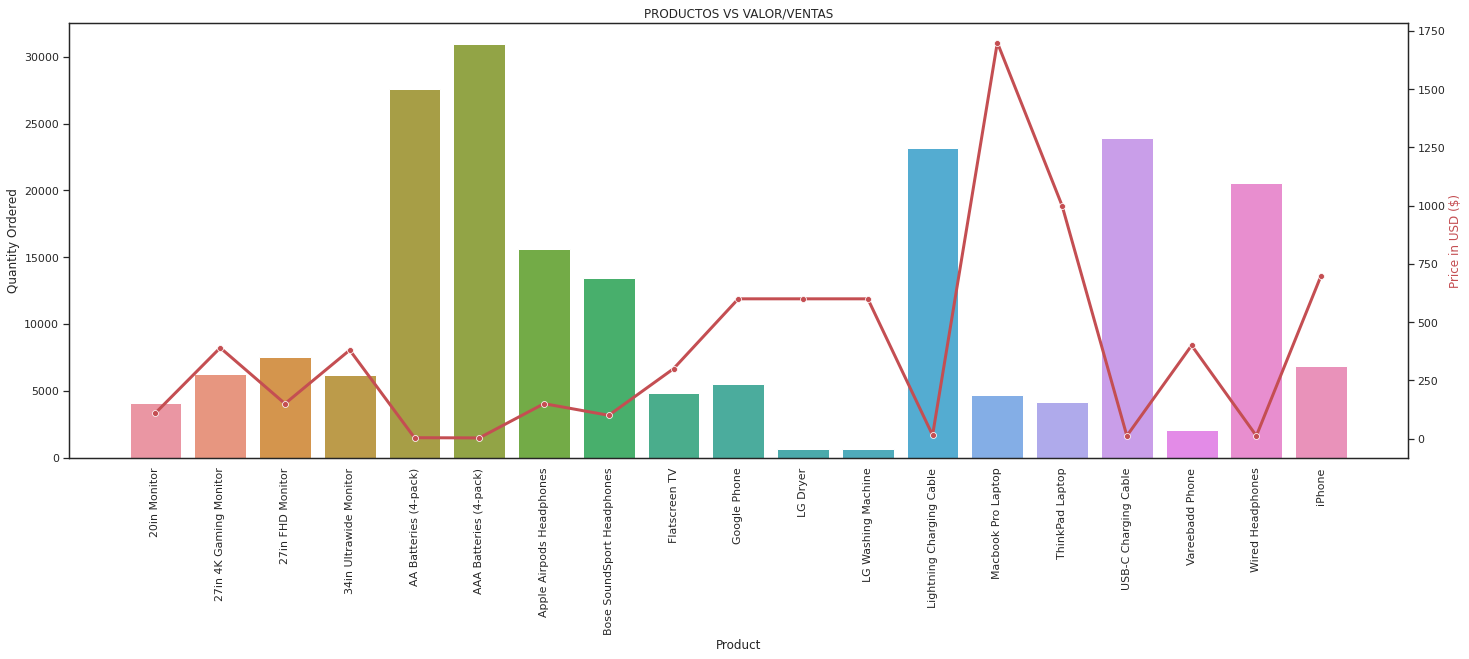

In [39]:
# ¿Qué producto se vendió más? ¿Por qué crees que vendió más?
product_group = df.groupby('Product')
quantity = product_group.sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']

sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(24,8))
ax2 = ax1.twinx()
plt.title('PRODUCTOS VS VALOR/VENTAS')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax1.set_xticklabels(quantity.index, rotation='vertical')
ax2.set_ylabel('Price in USD ($)', color='r')
sns.barplot(x=quantity.index, 
            y=quantity,
            ax=ax1)
sns.lineplot(x=prices.index, 
             y=prices,
             color='r',
             marker="o",
             ax=ax2)
plt.show()
sns.set()

Los productos más vendidos son baterías y cables, esto debido a su bajo valor y menor vida útil en comparación a los otros productos de la tienda tales como móviles, lavadoras, monitores, etc.